In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

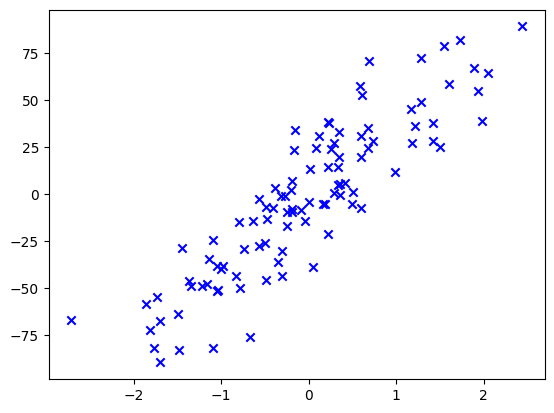

In [178]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=20, random_state=15)
plt.scatter(X, y, color="blue", marker="x")

M= [36.38789703]  B= -1.314206623292558


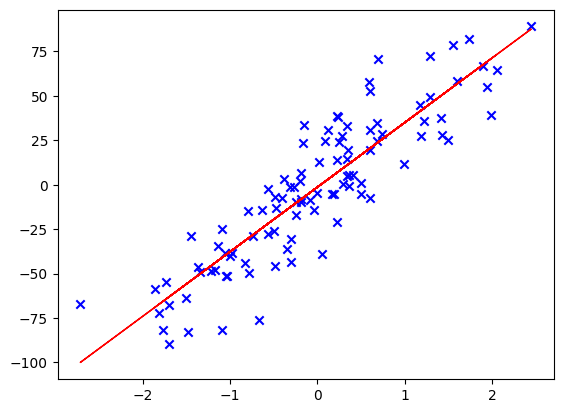

In [179]:
lRegression = LinearRegression()
lRegression.fit(X, y)
M = lRegression.coef_
B = lRegression.intercept_

print("M=", M, " B=", B)

plt.scatter(X, y, color="blue", marker="x")
plt.plot(X, M*X+B, color="red", linewidth=1)
plt.show()

In [180]:
class gdRegressor:
    def __init__(self, epochs, learning_rate):
        self.m_x = np.empty(epochs)
        self.b_x = np.empty(epochs)
        self.loss = np.empty(epochs)
        self.b = 100
        self.m = 200
        self.epochs = epochs
        self.lr = learning_rate
    
    def fitB(self, X, y, m):
        for i in range(self.epochs):
            db  = -2*np.sum(y - m*X.ravel() - self.b)

            self.b_x[i] = self.b
            self.loss[i] = np.sum((y-m*X+self.b)**2)
            
            self.b = self.b - self.lr*db
        print(self.b)
        return self.b_x, self.loss
    
    def fitM(self, X, y, b):
        for i in range(self.epochs):
            dm = -2*np.sum( (y - self.m*X.ravel() - b)*X.ravel() )

            self.m_x[i] = self.m
            self.loss[i] = np.sum((y-self.m*X+b)**2)
            
            self.m = self.m - self.lr*dm
        return self.m_x, self.loss

-1.31151557623746


Text(0, 0.5, 'loss')

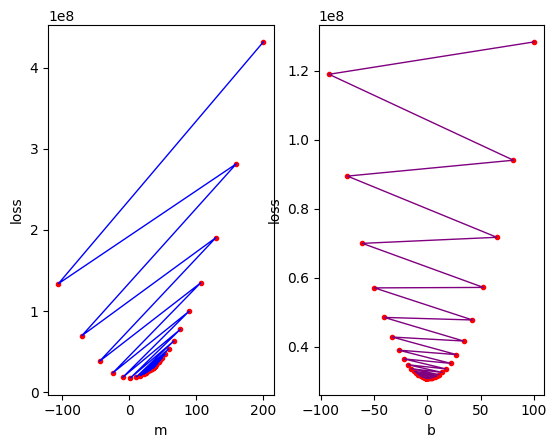

In [181]:
gd = gdRegressor(100, 0.009)
m_x, m_loss = gd.fitM(X, y, B)

plt.subplot(1,2,1)
plt.scatter(m_x, m_loss, c="red", marker=".")
plt.plot(m_x, m_loss, c="blue", linewidth=1)
plt.xlabel("m")
plt.ylabel("loss")

gd = gdRegressor(100, 0.0095)
b_x, b_loss = gd.fitB(X, y, M)

plt.subplot(1,2,2)
plt.scatter(b_x, b_loss, c="red", marker=".")
plt.plot(b_x, b_loss, c="purple", linewidth=1)
plt.xlabel("b")
plt.ylabel("loss")

In [215]:
# fig,ax=plt.subplots(1,1)
# m_arr = np.linspace(min(m_x),max(m_x), int(max(m_x)-min(m_x)))
# b_arr = np.linspace(min(b_x),max(b_x), int(max(b_x)-min(b_x)))
# mGrid, bGrid = np.meshgrid(m_arr, b_arr)
# print(mGrid.shape)
# final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T
# z_arr = []
# for i in range(final.shape[0]):
#     z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

# z = np.array(z_arr).reshape(10,10)   

# cp = ax.contourf(m_arr, b_arr, z)
# fig.colorbar(cp)
# ax.contour(m_x, b_x, z)
# ax.set_xlabel('m')
# ax.set_ylabel('b')
# plt.show()
# # m_x